# 5 Schätzung unbekannter Parameter


### 5.2 Konfidenzintervall bei Temperaturmessungen

a) Der Datensatz wird zunächst eingelesen



In [1]:
""" Bibliotheken importieren"""
from scipy.io import loadmat
from scipy.stats import norm   # normal-Verteilung
from scipy.stats import t     # t-Verteitung
from scipy.stats import chi2  # Chi-Quadrat-Verteilung 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

'''Laden des Datensatzes'''
Temp=loadmat('Selbstentzuendung')['Temp']
N=len(Temp)

Mittelwert und Standardabweichung ergeben sich aus den entsprechenden Funktionen in Python, Konfidenzbereiche werden mit den Formeln der Vorlesung abgeschätzt. 


Konfidenzbereich für den Mittelwert bei unbekannter Varianz


$\bar x - \frac{{{c_2} \cdot s}}{{\sqrt N }} < \mu  \le \bar x - \frac{{{c_1} \cdot s}}{{\sqrt N }}$

Konfidenzbereich für die Varianz

$\frac{{{s^2} \cdot \left( {N - 1} \right)}}{{{c_2}}} < {\sigma ^2} \le \frac{{{s^2} \cdot \left( {N - 1} \right)}}{{{c_1}}}$


In [2]:
'''Mittelwert und Standardabweichung'''
Tempquer= np.mean(Temp)
s=np.std(Temp, ddof=1)
Tempquer, s

(331.36986581765194, 6.953789160218103)

In [3]:
'''Konfidenzbereiche der Kenngrößen'''
alpha  = 0.05
c1=t.ppf(0.025,N-1)
c2=t.ppf(0.975,N-1)
mu_min=Tempquer-((c2*s)/np.sqrt(N))
mu_max=Tempquer-((c1*s)/np.sqrt(N))

C1_v=chi2.ppf(alpha/2,N-1)
C2_v=chi2.ppf((1-alpha/2),N-1)
sig_min=np.sqrt(((s**2)*(N-1))/C2_v)
sig_max=np.sqrt(((s**2)*(N-1))/C1_v)

c1,c2, mu_min,mu_max, C1_v, C2_v, sig_min, sig_max

(-2.0226909117347285,
 2.022690911734728,
 329.14593616187597,
 333.5937954734279,
 23.654324557593025,
 58.12005973468633,
 5.696273013715572,
 8.928912077075571)

b) Die Darstellung der Stichprobe als Histogramm 

c) Bei der Darstellung der Wahrscheinlichkeitsverteilung muss berücksichtigt werden, dass sich die Flächen entsprechen. Deshalb wird die Wahrscheinlichkeitsdichte für eine einheitli-che Darstellungsform normiert.

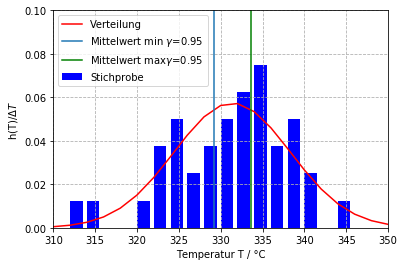

In [7]:
'''Berechnung des entsprechenden Histogramms mit einer Gesamtfläche von 1 ''' 
'''Berechnung der entsprechenden Verteilung'''

dTemph = 2
Temph = np.arange(310,350+dTemph,dTemph)
plt.hist(Temp,Temph, weights=(Temp/Temp)/(dTemph*N),width=1.5, color='b')
plt.plot(Temph, norm.pdf(Temph,Tempquer,s ), color='r')
plt.ylim(top=0.1)
plt.xlim(right=350, left=310)
plt.plot([mu_min,mu_min],[0,1])
plt.plot([mu_max,mu_max],[0,1],color='g')
plt.xlabel('Temperatur T / °C')
plt.ylabel('h(T)/$\Delta T$')
plt.legend(('Verteilung','Mittelwert min $\gamma$=0.95','Mittelwert max$\gamma$=0.95','Stichprobe' ))
plt.grid(True, which= 'both', axis='both', linestyle='--')

d) Bei der Verteilung sind weder Mittelwert noch Varianz bekannt. Die Variable x weist eine Varianz von s² auf, die Variable $\bar x $ weist eine Varianz von s²/N auf. Die Differenz beider Variablen weist damit eine Varianz von s².(1 + 1/N) auf. Da die Varianz nicht bekannt ist, muss die t-Verteilung mit N - 1 Freiheitsgraden verwendet werden. Damit weist die Variable 


#### $t = \frac{{x - \bar x}}{{s \cdot \sqrt {1 + \frac{1}{N}} }}$


eine t-Verteilung mit N - 1 Freiheitsgraden auf. Das Prognoseintervall errechnet sich damit zu


$\bar x + {c_1} \cdot s \cdot \sqrt {1 + \frac{1}{N}}  < x \le \bar x + {c_2} \cdot s \cdot \sqrt {1 + \frac{1}{N}} $





In [5]:
''' Prognoseintervall zukünftige Stichprobenwerte'''
pr_min = Tempquer + t.ppf(alpha/2,N-1)*s*np.sqrt(1+1/N)
pr_max = Tempquer + t.ppf(1 - alpha/2,N-1)*s*np.sqrt(1+1/N)
pr_min,pr_max

(317.1297679364071, 345.60996369889676)

e) Für die Berechnung der Wahrscheinlichkeit für eine Temperatur T < 300 °C errechnet sich wieder aus der t-Verteilung, da die Verteilung der zukünftiger Stichprobenwerte entspricht. Mit dieser Verteilung und den berechneten Kenngrößen kann die Wahrscheinlichkeit dafür, dass das Papier brennt, berechnet werden zu P(Papier brennt) = 34.259 ppm. Die Wahrschein-lichkeit dafür, dass das Papier nicht brennt, ergibt sich damit zu P(Papier brennt nicht) = 1 – 34 ppm.

In [6]:
 '''Wenn die Selbstentzündungstemperatur > als 300 °C ist, entzündet sich das'''
 '''Papier bei 300 °C nicht, Berechnung der Wahrscheinlichkeit'''
p = t.cdf((300-Tempquer)/s/np.sqrt(1+1/N),N-1)
p, 1-p

(3.425854893173533e-05, 0.9999657414510683)